<a href="https://colab.research.google.com/github/gjurcin/nlp_classification/blob/main/NLP_SPAM_detection_gjurcin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Detection

The goal is to create a model that will detect if a given email is a SPAM or not.

Dataset:
https://drive.google.com/file/d/1b9HGiCd5KBppH8QG_20BDALIBguDngjU/view?usp=sharing


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

## 1. Read the data

In [ ]:
path_to_text = 'datasets-spam.csv'
data = pd.read_csv(path_to_text, encoding='latin-1')[['v1', 'v2']]

# Creating the feature set and label set
text = data['v2']
label = data['v1']
data[5:10]

,v1,v2
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Print the distribution of the data (number of positive-spam vs negative-ham)

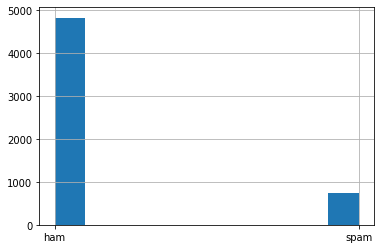

In [ ]:
data.v1.hist()

## 2. Preprocess the data

Use NLTK when needed
- covert to lower letters
- remove punctuation
- tokenization
- stop-words removal 
- lemmatization (use also Part of Speech tagger)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
stopwords_ = stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
text_preprocessed = []
for sentence in text:
    #sentence lower
    sentence = sentence.lower()
    #string punct
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    #tokenize
    tokens = nltk.word_tokenize(sentence)
    # stop-words
    tokens_stop_words = []
    for token in tokens:
      if token not in stopwords_:
        tokens_stop_words.append(token)
    # Lemmatization
    tokens_lemma = []
    for token in tokens_stop_words:
      tokens_lemma.append(wnl.lemmatize(token, get_wordnet_pos(nltk.pos_tag([token])[0][1])))
    final = ' '.join(tokens_lemma)
    text_preprocessed.append(final)

In [ ]:
text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
len(text_preprocessed),len(text)

(5572, 5572)

## 3. Count Vecotrizer model

- use Count Vectorizer to create the feature vectors
- Separate the data in train and test (the first 70% are train, the rest 30% are test)
- Train three models: Logistic Regression
- Evaluate the model on the test data (calculate: accuracy, precision, recall and F1-score for each class, and the confusion matrix)

*Note: you will have to covert the labels from strings to binary - using the LabelEncoder()

In [ ]:
train_ratio= int(len(text)*0.7)
trainX, testX =text_preprocessed[:train_ratio], text_preprocessed[train_ratio:]
trainY, testY =label[:train_ratio], label[train_ratio:]
len(trainX), len(testX) ,len(trainY), len(testY)

(3900, 1672, 3900, 1672)

In [ ]:
#encode lables (0-ham, 1-spam)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
trainY= le.fit_transform(trainY)
testY = le.fit_transform(testY)
trainY.shape,testY.shape

((3900,), (1672,))

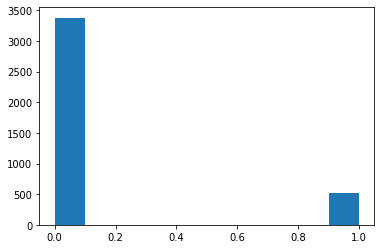

In [ ]:
plt.hist(trainY)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(max_features=5000)
count_vect.fit(text_preprocessed)

# transform the training and test data using count vectorizer object
trainX_vec = count_vect.transform(trainX)
testX_vec = count_vect.transform(testX)
trainX_vec.shape,testX_vec.shape

((3900, 5000), (1672, 5000))

In [ ]:
trainX_vec[0], trainX[0]

(<1x5000 sparse matrix of type '<class 'numpy.int64'>'
 	with 12 stored elements in Compressed Sparse Row format>,
 'go jurong point crazy available bugis n great world la e buffet cine get amore wat')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


#create an instance of the model
lr_model = LogisticRegression(random_state=7)
#train the model
lr_model.fit(trainX_vec, trainY)

#predict test data
pred_test = lr_model.predict(testX_vec)

#print evaluation metrics 
print(classification_report(testY,pred_test))
confusion_matrix(testY,pred_test)
print("Accuracy:",accuracy_score(testY, pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1444
           1       0.99      0.84      0.91       228

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy: 0.9772727272727273


## 4. TF-IDF model

- use TfidfVectorizer to create the feature vectors
- Separate the data in train and test (the first 70% are train, the rest 30% are test)
- Train three models: Logistic Regression
- Evaluate the model on the test data (calculate: accuracy, precision, recall and F1-score for each class, and the confusion matrix)

*Note: you will have to covert the labels from strings to binary - using the LabelEncoder()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000) 
tfidf.fit(text)

X_train_tfidf = tfidf.transform(trainX)
X_test_tfidf = tfidf.transform(testX)

X_train_tfidf.shape, X_test_tfidf.shape

((3900, 5000), (1672, 5000))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model_tf = LogisticRegression(random_state=0)
lr_model_tf.fit(X_train_tfidf, trainY)
pred_test_tf = lr_model_tf.predict(X_test_tfidf)

#print evaluation metrics 
print(classification_report(testY,pred_test_tf))
print(confusion_matrix(testY,pred_test_tf))
print("Accuracy:",accuracy_score(testY, pred_test_tf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1444
           1       0.97      0.68      0.80       228

    accuracy                           0.95      1672
   macro avg       0.96      0.84      0.89      1672
weighted avg       0.95      0.95      0.95      1672

[[1440    4]
 [  74  154]]
Accuracy: 0.9533492822966507


## 5. WordEmbeddings model

In additioan to the previous pre-processing steps, we need to:
- Truncate and pad the input sequences so that they are all the same length for modeling, size = 30 (use sequence.pad_sequences)
- Train Keras Sequential model with: Embedding layer (50 units), LSTM layer (50 units), Dense layer (1 unit). 
  - Create one model with RELU, another with Sigmoid
- Evaluate the model

In [ ]:
from keras.preprocessing.text import Tokenizer #similar to the CountVectorizer and TfIDF from keras

#The word embedding layer expects input sequences to be comprised of integers.
# integer encode sequences of words
tokenizer = Tokenizer()

tokenizer.fit_on_texts(text_preprocessed)

sequences = tokenizer.texts_to_sequences(text_preprocessed)
len(sequences),len(sequences[0]),len(sequences[1])

(5572, 16, 6)

In [ ]:
text_preprocessed[1]

'ok lar joking wif u oni'

In [ ]:
len(sequences[0]),len(sequences[1])

(16, 6)

In [ ]:
tokenizer.word_index

{'u': 1,
 'get': 2,
 'call': 3,
 'go': 4,
 '2': 5,
 'im': 6,
 'ur': 7,
 'come': 8,
 '4': 9,
 'dont': 10,
 'ok': 11,
 'ampltampgt': 12,
 'free': 13,
 'know': 14,
 'like': 15,
 'want': 16,
 'day': 17,
 'ill': 18,
 'good': 19,
 'time': 20,
 'love': 21,
 'say': 22,
 'text': 23,
 'send': 24,
 'need': 25,
 'see': 26,
 'take': 27,
 'one': 28,
 'make': 29,
 'well': 30,
 'today': 31,
 'think': 32,
 'r': 33,
 'home': 34,
 'txt': 35,
 'lor': 36,
 'reply': 37,
 'stop': 38,
 'tell': 39,
 'sorry': 40,
 'still': 41,
 'back': 42,
 'mobile': 43,
 'n': 44,
 'phone': 45,
 'new': 46,
 'work': 47,
 'later': 48,
 'week': 49,
 'da': 50,
 'hi': 51,
 'please': 52,
 'ask': 53,
 'miss': 54,
 'give': 55,
 'cant': 56,
 'ã\x8c': 57,
 'night': 58,
 'claim': 59,
 'wait': 60,
 'thing': 61,
 'great': 62,
 'try': 63,
 'much': 64,
 'oh': 65,
 'hey': 66,
 'dear': 67,
 'pls': 68,
 'message': 69,
 'number': 70,
 'amp': 71,
 'na': 72,
 'happy': 73,
 'friend': 74,
 'hope': 75,
 'way': 76,
 'wat': 77,
 'late': 78,
 'prize': 79

In [ ]:
sequences = np.array(sequences)

train_part= int(len(text)*0.7)
train_X, test_X =sequences[:train_part], sequences[train_part:]

train_X.shape,test_X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


((3900,), (1672,))

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len = 30
#transforms a list (of length num_samples) of sequences (lists of integers) 
#into a 2D Numpy array of shape (num_samples, num_timesteps) num_timesteps is the maxlen argument.
train_X_pad = pad_sequences(train_X, maxlen=max_len)
test_X_pad = pad_sequences(test_X, maxlen=max_len)
print(train_X_pad.shape)
print(test_X_pad.shape)

(3900, 30)
(1672, 30)


In [ ]:
train_X_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    4, 3814,  280,  577,  543, 1059,   44,   62,
        250, 1060,   94, 2539, 1061,    2, 3815,   77], dtype=int32)

In [ ]:
train_X[0]

[4, 3814, 280, 577, 543, 1059, 44, 62, 250, 1060, 94, 2539, 1061, 2, 3815, 77]

In [ ]:
#We need to know the size of the vocabulary for defining the embedding layer.
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8429

In [ ]:
# create the model
from keras.models import Model
from keras.layers import Input,Embedding,LSTM,Dense

def generate_model(vocab_size,max_len,embedding_size):

  _input = Input(max_len)

  x = Embedding(input_dim = vocab_size, output_dim = embedding_size, input_length=max_len) (_input)

  x = LSTM(100)(x)

  output = Dense(1, activation='sigmoid')(x)

  model = Model(inputs= [_input], outputs = [output])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
  

model = generate_model(vocab_size,max_len,embedding_size=50)
model.summary()

history = model.fit(train_X_pad, trainY, epochs=10, batch_size=60)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 30, 50)            421450    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 481,951
Trainable params: 481,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
65/65 [==============================] - 4s 36ms/step - loss: 0.4416 - accuracy: 0.8466
Epoch 2/10
65/65 [==============================] - 2s 36ms/step - loss: 0.0977 - accuracy: 0.9771
Epoch 3/10
65/65 [==============================] - 2

In [ ]:
pred_test = model.predict(test_X_pad)
#pred_test = np.argmax(pred_test,axis=1)
pred_test = pred_test.round()

#print evaluation metrics 
print(classification_report(testY,pred_test))
print(confusion_matrix(testY,pred_test))
print("Accuracy:",accuracy_score(testY, pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1444
           1       0.98      0.92      0.95       228

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

[[1439    5]
 [  19  209]]
Accuracy: 0.9856459330143541


In [ ]:
pred_test

array([[1.0964839e-04],
       [1.8012886e-05],
       [1.6417334e-05],
       ...,
       [5.9005618e-04],
       [4.3566601e-05],
       [2.1302700e-04]], dtype=float32)

In [ ]:
pred_test.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)